# Introduction to Machine Learning

We have seen Machine Learning as a buzzword for the past few years. The reason for this might be the high amount of data production by applications, the increase of computation power in the past few years and the development of better algorithms.
Machine Learning is used anywhere from automating mundane tasks to offering intelligent insights, industries in every sector try to benefit from it. You may already be using a device that utilizes it. For example, a wearable fitness tracker like Fitbit, or an intelligent home assistant like Google Home. But there are much more examples of ML in use.
Prediction — Machine learning can also be used in the prediction systems. Considering the loan example, to compute the probability of a fault, the system will need to classify the available data in groups.

- **Image recognition:** Machine learning can be used for face detection in an image as well. There is a separate category for each person in a database of several people.
- **Speech Recognition:** It is the translation of spoken words into the text. It is used in voice searches and more. Voice user interfaces include voice dialing, call routing, and appliance control. It can also be used as a simple data entry and the preparation of structured documents.
- **Medical diagnoses:** ML is trained to recognize cancerous tissues.
- **Financial Industry and Trading:** Companies use ML in fraud investigations and credit checks.

__compiledby__ = *"Justice Agbadu"*

### But what is Machine Learning?

- Machine Learning is an interdisciplinary field that uses statistics, probability, algorithms to learn from data and provide insights which can be used to build intelligent applications.
- The basic premise of machine learning is to build algorithms that can receive input data and use statistical analysis to predict an output while updating outputs as new data becomes available.

### Types of Machine Learning

- Supervised Learning
- Unsupervised Learning
- Reinforcement Learning

**Import pandas and numpy**

In [1]:
import pandas as pd
import numpy as np

**Import plotting libraries**

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

**Activate Jupyter inline plotting**

In [3]:
%matplotlib inline

**Load the dataset**

In [4]:
df = pd.read_csv('lemonade.csv')

**Explore the dataset**

In [5]:
df.head()

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales
0,01/01/2017,Sunday,27.0,2.00,15,0.3,10
1,02/01/2017,Monday,28.9,1.33,15,0.3,13
2,03/01/2017,Tuesday,34.5,1.33,27,0.3,15
3,04/01/2017,Wednesday,44.1,1.05,28,0.3,17
4,05/01/2017,Thursday,42.4,1.00,33,0.3,18


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 7 columns):
Date           365 non-null object
Day            365 non-null object
Temperature    365 non-null float64
Rainfall       365 non-null float64
Flyers         365 non-null int64
Price          365 non-null float64
Sales          365 non-null int64
dtypes: float64(3), int64(2), object(2)
memory usage: 20.0+ KB


In [7]:
df.describe()

,Temperature,Rainfall,Flyers,Price,Sales
count,365.000000,365.000000,365.000000,365.000000,365.000000
mean,60.731233,0.826603,40.284932,0.333973,25.323288
std,16.196266,0.273171,13.178651,0.075206,6.893589
min,15.100000,0.470000,9.000000,0.300000,7.000000
25%,49.700000,0.650000,31.000000,0.300000,20.000000
50%,61.100000,0.740000,39.000000,0.300000,25.000000
75%,71.300000,0.910000,49.000000,0.300000,30.000000
max,102.900000,2.500000,80.000000,0.500000,43.000000


**Visualize the relationship between different features**

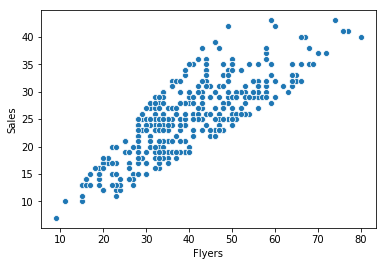

In [8]:
sns.scatterplot(x = 'Flyers', y = 'Sales', data = df)

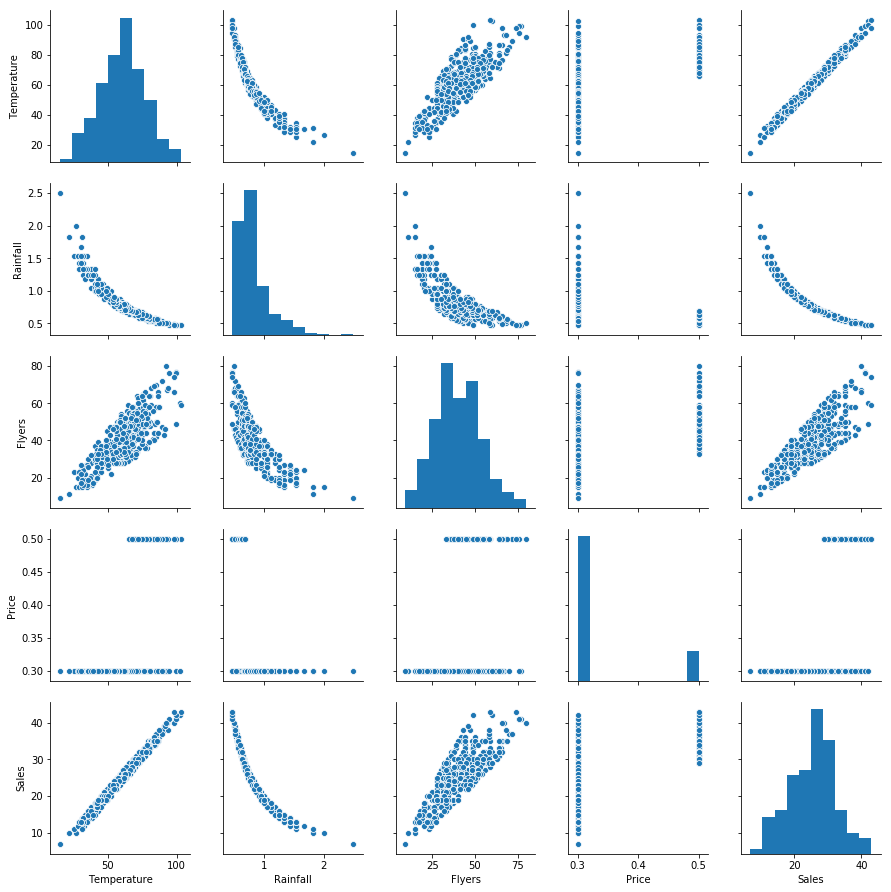

In [9]:
sns.pairplot(df)

**Visualize the heatmap of the correlation between numerical variables**

In [10]:
corr = df.corr()

In [11]:
corr

,Temperature,Rainfall,Flyers,Price,Sales
Temperature,1.000000,-0.902859,0.797719,0.504709,0.989832
Rainfall,-0.902859,1.000000,-0.747389,-0.383775,-0.909214
Flyers,0.797719,-0.747389,1.000000,0.405437,0.805183
Price,0.504709,-0.383775,0.405437,1.000000,0.512908
Sales,0.989832,-0.909214,0.805183,0.512908,1.000000


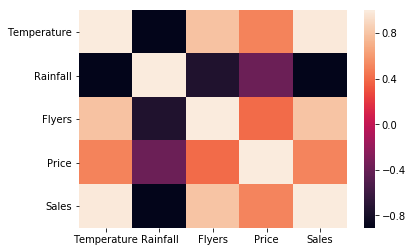

In [12]:
sns.heatmap(corr)

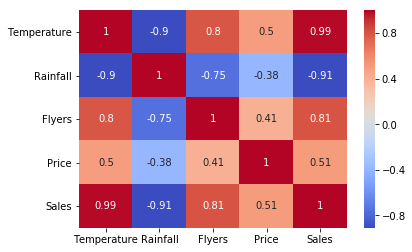

In [13]:
sns.heatmap(corr, cmap = 'coolwarm', annot = True)

# Machine Learning Proper

**Check out the columns and define training features and label**

In [14]:
df.columns

Index(['Date', 'Day', 'Temperature', 'Rainfall', 'Flyers', 'Price', 'Sales'], dtype='object')

In [15]:
X = df[['Temperature', 'Rainfall', 'Flyers', 'Price']]

In [26]:
X2 = df.loc[0:9, ['Temperature', 'Rainfall', 'Flyers', 'Price']]

In [58]:
X3 = df.iloc[0:10, 2:6]

In [59]:
X3

,Temperature,Rainfall,Flyers,Price
0,27.0,2.00,15,0.3
1,28.9,1.33,15,0.3
2,34.5,1.33,27,0.3
3,44.1,1.05,28,0.3
4,42.4,1.00,33,0.3
5,25.3,1.54,23,0.3
6,32.9,1.54,19,0.3
7,37.5,1.18,28,0.3
8,38.1,1.18,20,0.3
9,43.4,1.05,33,0.3


In [16]:
y = df['Sales']

**Split the dataset**

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 100)

**Fit the model**

In [37]:
from sklearn.linear_model import LinearRegression

In [38]:
lm = LinearRegression()

In [39]:
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

**Take a look at the coefficients**

In [42]:
lm.intercept_

2.869734889840693

In [43]:
lm.coef_

array([ 0.37148313, -2.08399189,  0.01504579,  2.99141093])

In [44]:
cdf = pd.DataFrame(lm.coef_, X.columns, columns = ['Coefficients'])

In [45]:
cdf

,Coefficients
Temperature,0.371483
Rainfall,-2.083992
Flyers,0.015046
Price,2.991411


# Sales = ax1 + bx2 + cx3 + dx4 + e

In [46]:
df.head()

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales
0,01/01/2017,Sunday,27.0,2.00,15,0.3,10
1,02/01/2017,Monday,28.9,1.33,15,0.3,13
2,03/01/2017,Tuesday,34.5,1.33,27,0.3,15
3,04/01/2017,Wednesday,44.1,1.05,28,0.3,17
4,05/01/2017,Thursday,42.4,1.00,33,0.3,18


# y = ax + b

**Make predictions**

In [48]:
predictions = lm.predict(X_test)

In [49]:
predictions

array([29.72496424, 27.91614347, 19.93838854, 20.15166028, 30.56664592,
       26.48232196, 24.27931353, 28.97272598, 35.71751399, 11.95699821,
       20.84911198, 29.51237967, 25.7934144 , 40.83448232, 36.93336608,
       30.87908717, 28.51757322, 31.40214042, 15.65994713, 16.89630882,
       25.74594043, 28.53487253, 24.10913666, 21.81084998, 25.36745918,
       23.23154893, 26.91632485, 24.85251631, 25.10170993, 24.74953243,
       14.03860254, 25.52679148, 22.65834614, 25.31853399, 20.76775861,
       33.53691805, 23.78554089, 25.19157126, 31.40946885, 19.20230113,
       34.44180045, 28.03305223, 12.67211471, 12.66319336, 10.30238693,
       33.2058725 , 31.47546648, 29.28402596, 25.39376292, 41.41771872,
       24.58635368, 26.55217014, 38.96202088, 28.92793928, 32.98718384,
       33.82199737, 12.76922138, 14.18589699, 17.77034423, 19.99165665,
       28.01098797, 31.59970367, 24.3094051 , 35.19019227, 24.36958824,
       13.13999699, 23.90357056, 13.06547558, 29.2817097 , 34.86

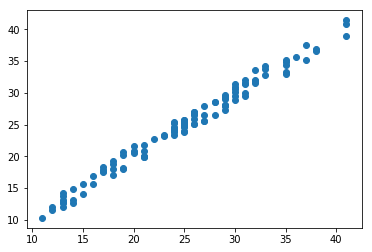

In [51]:
plt.scatter(y_test, predictions)

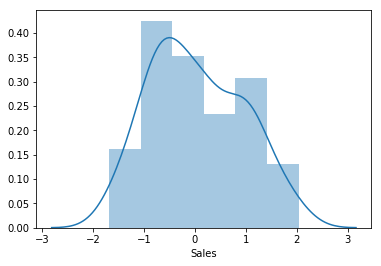

In [52]:
sns.distplot(y_test - predictions)

**Evaluate the model model**

In [53]:
from sklearn import metrics

In [54]:
metrics.mean_absolute_error(y_test, predictions)

0.7642491860575036

In [55]:
metrics.mean_squared_error(y_test, predictions)

0.81917712456333

In [56]:
np.sqrt(metrics.mean_squared_error(y_test, predictions))

0.905084042817754

# Sources

- **https://towardsdatascience.com/introduction-to-machine-learning-for-beginners-eed6024fdb08**